In [1]:
%matplotlib inline
from dpm.train import train
from dpm.visualize import plot_model, plot_models, plot_stats, plot_hist
from dpm.distributions import Normal
from dpm.divergences import forward_kl, reverse_kl, js_divergence
from dpm.mixture_models import MixtureModel

# Learning Distributions through Differentiable Divergences

---

### By Bill Watson
### July 25, 2019

## Primer: What are we used to?

---

* Data as X samples, Y labels
* Make a prediction y hat
* Fit a model to minimize the difference between our predicitions and the true labels

### Reframed as a Probabilistic Model

---

* What if we wanted to learn a distribution
    * No longer have labels
    * But instead we can sample and/or exmaine probabilities
* We can think of our data X ~ P, where P is a Random Variable
* Examples:
    * Classification is fitting two multinomial distributions
    * Regression as fitting a normal distribution centered around the line of best fit

### But What Does This Mean?

---

* Fitting two distributions implies minimizing their difference ("distance")
* This "distance" between two distributions can be encoded as a Divergence, which must statisfy 2 properties:
    * Non-negative for all p, q
    * Zero if p = q
    

### Kullback - Leibler Divergence

---

$${\displaystyle D_{\text{KL}}(P\parallel Q)=\int _{-\infty }^{\infty }p(x)\log \left({\frac {p(x)}{q(x)}}\right)\,dx}	
$$


The KL Divergence gives us the following:
$$\displaystyle D_{\text{KL}}(P\parallel Q) \geq 0 \forall P, Q$$
$$\displaystyle D_{\text{KL}}(P\parallel Q) = 0 \iff P = Q$$


However, the KL Divergence is not symmetric:
$$\displaystyle D_{\text{KL}}(P\parallel Q) \not= \displaystyle D_{\text{KL}}(Q\parallel P)$$

### Directionality: Forward KL Divergence

---

$${\displaystyle D_{\text{KL}}(P\parallel Q)=\int _{-\infty }^{\infty }p(x)\log \left({\frac {p(x)}{q(x)}}\right)\,dx}	
$$

### Disgression: How KL becomes to Cross-Entropy Loss

---

$${\displaystyle {\begin{aligned}D_{\text{KL}}(P\parallel Q)&=-\sum _{x\in {\mathcal {X}}}p(x)\log q(x)+\sum _{x\in {\mathcal {X}}}p(x)\log p(x)\\&=\mathrm {H} (P,Q)-\mathrm {H} (P)\end{aligned}}}$$

###   Using the Forward KL to learn a Normal Distribution

---



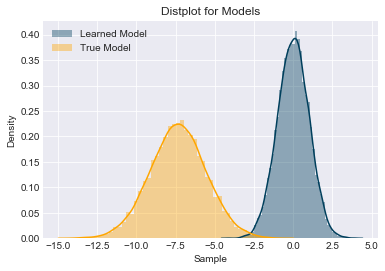

In [2]:
p_model = Normal(-7.3, 3.2)
q_model = Normal(0.0, 1.0)

plot_models(p_model, q_model)

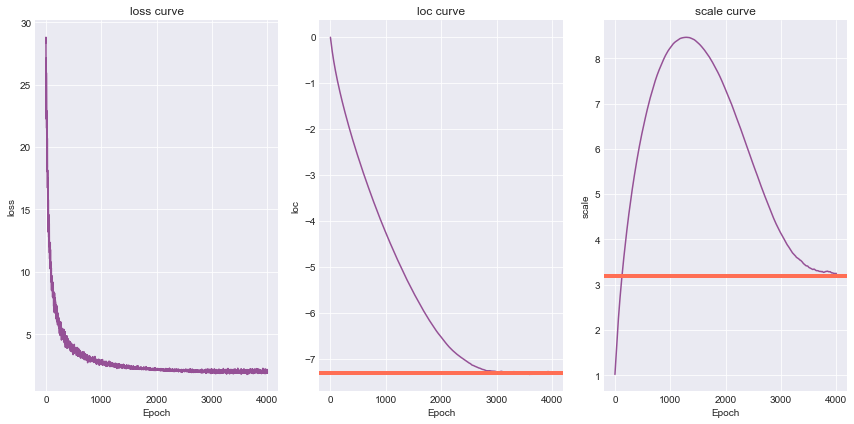

In [3]:
p_model = Normal(-7.3, 3.2)
q_model = Normal(0.0, 1.0)
stats = train(p_model, q_model, forward_kl, epochs=4000)
plot_stats(stats, goals=[p_model.loc.item(), p_model.scale.item()])

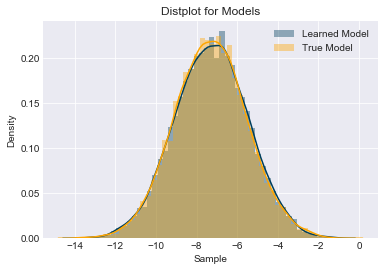

In [4]:
plot_models(p_model, q_model)

### Digression: Mixture Models

---

* Do it

### Example Gaussian Mixture Model

---

#### Simple Bimodal Model

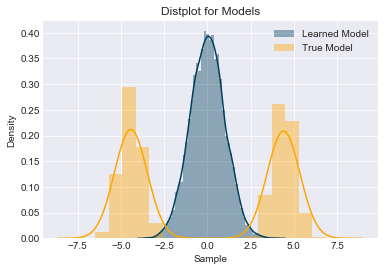

In [5]:
p_model = MixtureModel([Normal(4.4, 0.4), Normal(-4.4, 0.4)], [0.5, 0.5])
q_model = Normal(0.0, 1.0)

plot_models(p_model, q_model)

### Fitting a Unimodal Normal to a Bimodal with Forward KL

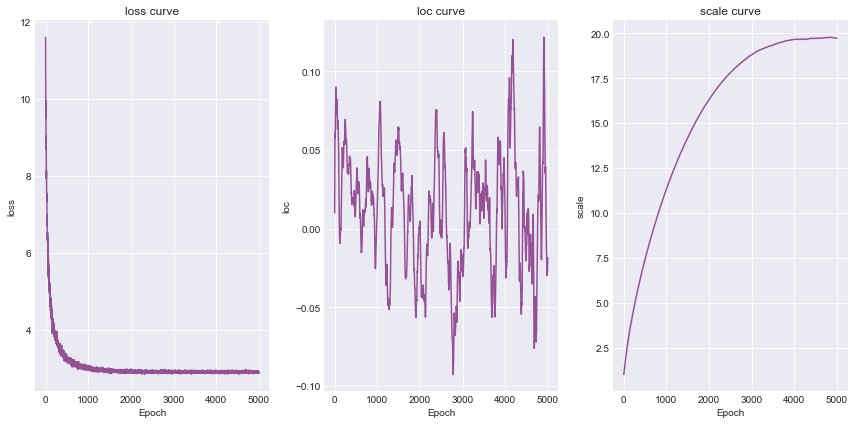

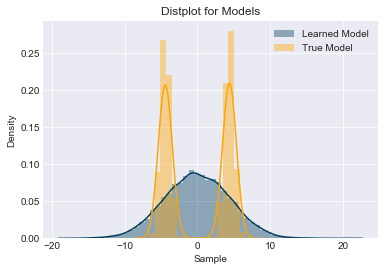

In [17]:
p_model = MixtureModel([Normal(4.4, 0.4), Normal(-4.4, 0.4)], [0.5, 0.5])
q_model = Normal(0.0, 1.0)

stats = train(p_model, q_model, forward_kl, epochs=5000)
plot_stats(stats)
plot_models(p_model, q_model)

### What Happened Here?

---

* Forward KL Exhibits something known as Zero - Avoiding
    * In essence, this means the optimal solution is to average the peaks under the coverage of one large distribution

### Reverse KL

---

* Recall: KL Divergence is NOT symmetric
* What if we flipped P and Q
    * We get the Reverse KL
    
    SHOW MATH

### Digression: Differentialble Sampling with the Reparameterization Trick

---

* Reparameterization:
    * Give defnitation
* Normal Example:
    SHOW




### Digression: Common Reparameterization Tricks

---

Table of Distribtuions and Reaparam Sampling

### Learning with Reverse KL

---


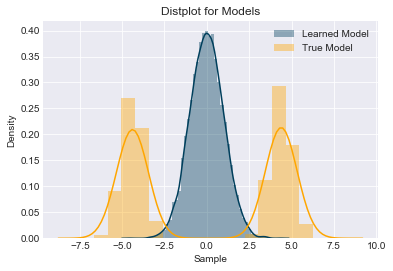

In [19]:
p_model = MixtureModel([Normal(4.4, 0.4), Normal(-4.4, 0.4)], [0.5, 0.5])
q_model = Normal(0.0, 1.0)

plot_models(p_model, q_model)

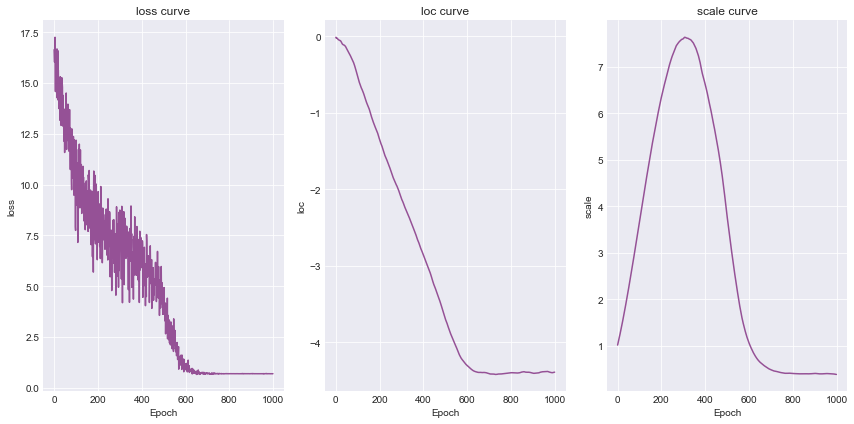

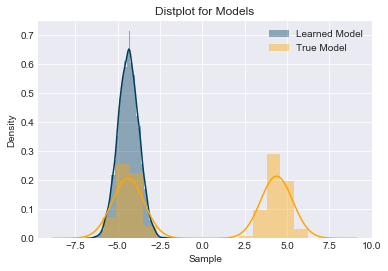

In [29]:
p_model = MixtureModel([Normal(4.4, 0.4), Normal(-4.4, 0.4)], [0.5, 0.5])
q_model = Normal(0.0, 1.0)

stats = train(p_model, q_model, reverse_kl, epochs=1000)
plot_stats(stats)
plot_models(p_model, q_model)

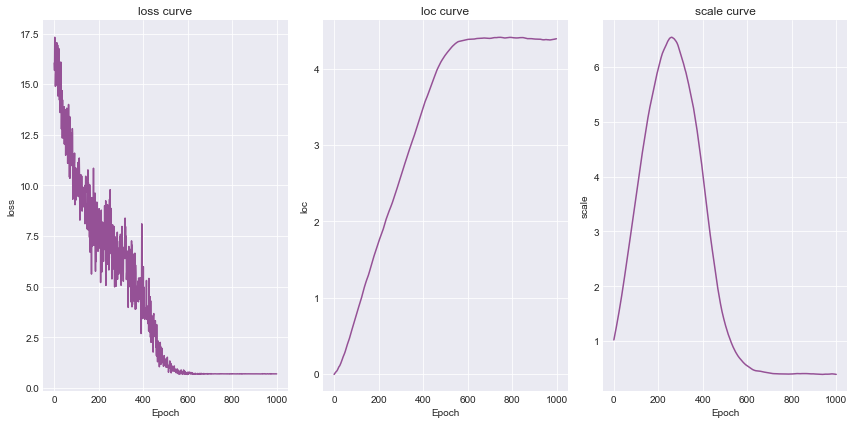

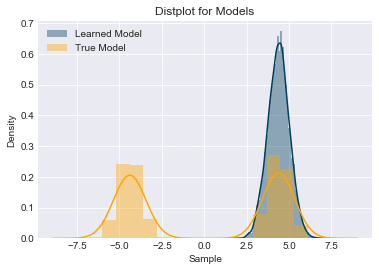

In [31]:
p_model = MixtureModel([Normal(4.4, 0.4), Normal(-4.4, 0.4)], [0.5, 0.5])
q_model = Normal(0.0, 1.0)

stats = train(p_model, q_model, reverse_kl, epochs=1000)
plot_stats(stats)
plot_models(p_model, q_model)

### What Happened?

---

* Reverse KL is Zero - Avoiding?
    * This is also know as Mode Collapse, where the distribution "collapses" onto one of the peaks
    

### Jensen - Shannon Divergence

---

* The JS Divergence extends the KL divergence to be symmetric
DO MATH

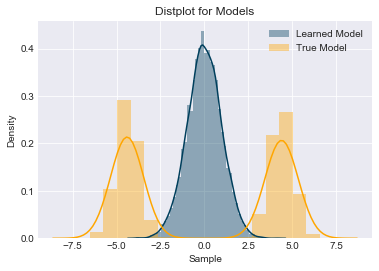

In [48]:
p_model = MixtureModel([Normal(4.4, 0.4), Normal(-4.4, 0.4)], [0.5, 0.5])
q_model = Normal(0.0, 1.0)

plot_models(p_model, q_model)

In [ ]:
p_model = MixtureModel([Normal(4.4, 0.4), Normal(-4.4, 0.4)], [0.5, 0.5])
q_model = Normal(0.0, 1.0)

stats = train(p_model, q_model, js_divergence, epochs=1000)
plot_stats(stats)
plot_models(p_model, q_model)

### F-Divergence: A Family of Divergences

---

Math

### Wasserstein Metric: Earth Movers Distance

---

Math

Summary Table

### Sample - Sample Training with Variational Inference

### Advanced Topics: Extensions to the ideas presented in this talk

---

1. Adversarial Training with GANs
    * GANs approximate JS-Divergence
    * WGANs approximate Wassterstein Metric (EMD)
    * LSGANs appriximate the Pearson Chi Squared Metric
2. MCMC Methods
    * Good for generating samples from distirbutions where sampling is difficult
3. Transformed Distribtuions
    * G
    